# Ville de Paris - programme "Végétalisons la ville"

# Data is for Good - aidons Paris à devenir une smart-city !

##### Analyse exploratoire - Arbres de la ville de Paris<a class="anchor" id="titre"></a>
![](imageArbresParis.jpg)

Dans le cadre de sa politique Espaces Verts, la ville de Paris s'est associée avec l'ONG Data is for Good pour proposer un concours. Le challenge consiste à analyser un jeu de données portant sur les arbres de la Ville de Paris.
l'objectif des services de la mairie est demieux comprendre ses données et à termes d'optimiser les tournées d'entretien de ses agents.

### Table des matières
* [Data is for Good & Ville de Paris](#titre)
* [PARTIE 1 - PRÉSENTATION GÉNÉRALE DU JEU DE DONNÉES](#P1)
    * [1.1) Importation du jeu de données et des librairies Python utiles](#11)
    * [1.2) Caractéristiques générales du dataframe généré](#12)
    * [1.3) des valeurs manquantes ?](#13)
    * [1.4) Mesures statistiques sur les données brutes](#14)
* [PARTIE 2 - DÉMARCHE MÉTHODOLOGIQUE D'ANALYSE DE DONNÉES](#P2)
    * [2.1) Regardons les colonnes plus en détail](#21)
    * [2.2) Nettoyage](#22)
* [PARTIE 3 - SYNTHÈSE DE L'ANALYSE DE DONNÉES](#P3)



# PARTIE 1 - PRÉSENTATION GÉNÉRALE DU JEU DE DONNÉES<a class="anchor" id="P1"></a>

## 1.1) Importation du jeu de données et des librairies Python utiles <a class="anchor" id="11"></a>

Comme demandé dans le cahier des charges, nous allons explorer le jeu de données avec le langage Python sur un Jupyther Notebook.

Les librairies utilisées seront :

In [1]:
import pandas as pd #to manipulate the dataset with dataframes
import numpy as np #for statistics and calculations
import matplotlib.pyplot as plt #for data visualisation
%matplotlib inline
import seaborn as sns #for data visualisation, with different proporties
import scipy.stats as st #for other statistics
import missingno as ms #for visualisation of missing data

Le data set fourni est mis à disposition par la ville de Paris et contient des informations sur les arbres dont la ville a en charge l'entretien.
En voici une importation brute :

In [2]:
dataBrute=pd.read_csv("p2-arbres-fr.csv", sep=';') #import data set in an dataframe

display(dataBrute.head())

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


## 1.2) Caractéristiques générales du dataframe généré<a class="anchor" id="12"></a>

Déterminons dans un premier temps ses dimensions :

In [3]:
print("La data set comporte ",dataBrute.shape[0]," lignes et ",dataBrute.shape[1]," colonnes") #dimensions of the dataframe

La data set comporte  200137  lignes et  18  colonnes


Ensuite regardons les types de valeur de chaque colonne (utile pour savoir de quoi il retourne et comment les manipuler):

In [4]:
display(dataBrute.dtypes)

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

`int` correspond à des nombres entiers, `float` à des nombres décimaux et `object` à des données textuelles.

Tout à l'air normal, sauf peut-être la colonne `id_emplacement` , qu'intuitivement, on aurait imaginé en entier. Peut-être des différences ou erreurs de formatage ?

On pourrait penser que la colonne `arrondissmement` serait plus "pratique" en type entier. A voir.

On peut essayer aussi de décrire succintement à quoi correspond chaque colonne. 

In [5]:
# Description of each column, in a numpy array
colDescripVar=np.array([
    "identifiant de chaque arbre sur la forme d'un numéro",
    "type de végétal",
    "type d'espace public où se situe l'arbre",
    "arrondissement de Paris",
    "complément d'adresse",
    "numéro de l'adresse",
    "adresse de l'arbre",
    "identifiant de l'emplacement",
    "nom de l'espèce en langage commun",
    "genre de l'arbre",
    "nom de l'espèce en latin",
    "variété de l'espèce",
    "circonférence en centimètres",
    "hauteur en mètres",
    "stade de développement, reflète l'âge",
    "précise si oui ou non l'arbre est remarquable",
    "latitude",
    "longitude"]
)
# the array is transformed into a column 
colDescripVar=colDescripVar.reshape(len(colDescripVar),1)

On remarque que ces colonnes peuvent être classées en différents groupes :
- biométrie : décrire les arbres ou quantifier leurs caractéristiques
- localisation : repérer chaque arbre dans Paris
- identification : donner un numéro ou une chaine de caractère unique

In [6]:
# create a columns for groups
colGroupVar=np.array([
    "identification",
    "biométrie",
    "localisation",
    "localisation",
    "localisation",
    "localisation",
    "localisation",
    "identification",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "localisation",
    "localisation"
])
colGroupVar=colGroupVar.reshape(len(colGroupVar),1)

#put both arrays in a numpy board
tabInfos=np.hstack((colDescripVar,colGroupVar,))

Pour plus de lisibilité, on place ces informations dans un dataframe, que l'on nomme `dataInfos`.

In [7]:
#numpy board into pandas dataframe
dataInfos=pd.DataFrame(index=dataBrute.columns,data=tabInfos,columns=["Description colonne","Groupe colonne"])

display(dataInfos)

,Description colonne,Groupe colonne
id,identifiant de chaque arbre sur la forme d'un ...,identification
type_emplacement,type de végétal,biométrie
domanialite,type d'espace public où se situe l'arbre,localisation
arrondissement,arrondissement de Paris,localisation
complement_addresse,complément d'adresse,localisation
numero,numéro de l'adresse,localisation
lieu,adresse de l'arbre,localisation
id_emplacement,identifiant de l'emplacement,identification
libelle_francais,nom de l'espèce en langage commun,biométrie
genre,genre de l'arbre,biométrie


## 1.3) des valeurs manquantes ?<a class="anchor" id="13"></a>

On peut s'intéresser aussi aux valeurs manquantes de notre jeu de données. On rajoute dans le tableau `dataInfos` :
- une colonne avec le nombre de valeurs `NaN` (pour *Not a Number*)
- une colonne avec la même information en pourcentage

In [8]:
dataInfos["Nb NaN"]=dataBrute.isna().sum() #on compte le nombre de valeurs manquantes dans chaque colonne.
dataInfos["% NaN"]=(round(dataBrute.isna().mean()*100)).astype(int).astype(str)+" %" #on calcule la proportion de valeurs 
#manquantes pour chaque colonne.
display(dataInfos)

,Description colonne,Groupe colonne,Nb NaN,% NaN
id,identifiant de chaque arbre sur la forme d'un ...,identification,0,0 %
type_emplacement,type de végétal,biométrie,0,0 %
domanialite,type d'espace public où se situe l'arbre,localisation,1,0 %
arrondissement,arrondissement de Paris,localisation,0,0 %
complement_addresse,complément d'adresse,localisation,169235,85 %
numero,numéro de l'adresse,localisation,200137,100 %
lieu,adresse de l'arbre,localisation,0,0 %
id_emplacement,identifiant de l'emplacement,identification,0,0 %
libelle_francais,nom de l'espèce en langage commun,biométrie,1497,1 %
genre,genre de l'arbre,biométrie,16,0 %


La fonction `missingno.matrix()` permet de visualiser ces valeurs manquantes et d'appréhender simplement la problèmatique :

<Axes: >

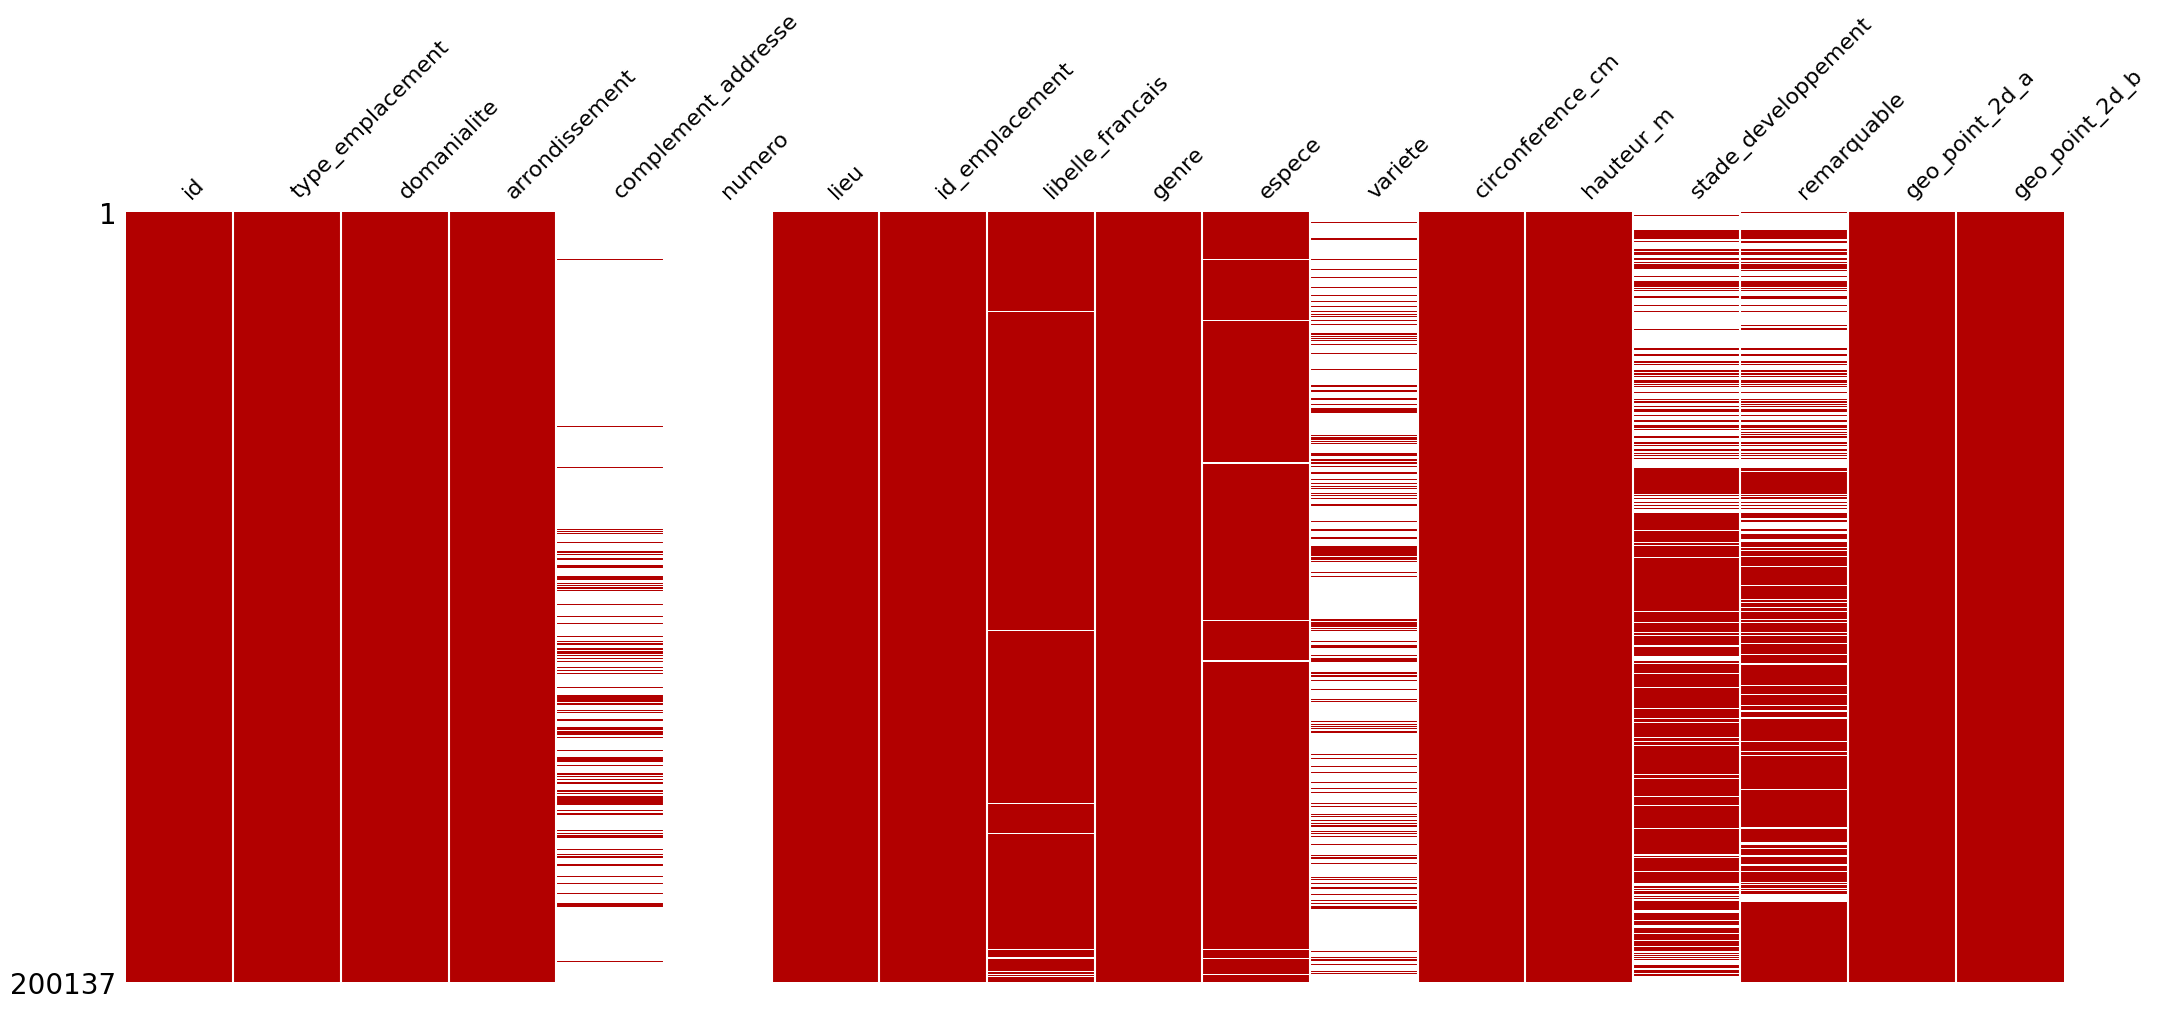

In [36]:
display(ms.matrix(dataBrute,color=[0.7,0.0,0.0],sparkline=False)) #dataviz of missing data

On remarque que certaines colonnes sont vraiment très peu renseignées :

- `complement_adresse` - 85% vide. Très difficile à considérer dans l'étude
- `numero` - 100% vide. Ne pas la considérer
- `variete`- 82% vide. très difficile à considérer
- `stade_developpement`- 34% vide. Prendre garde.
- `remarquable`- 34% vide. Prendre garde.

On peut faire d'autre observations :

- `espece` - 1% vide, `libelle_francais` - 1% vide, `genre` - 16 valeurs manquantes. Intéressant car visuellement les valeurs manquantes ne semblent pas être au même endroit. Serait peut-être possible de réaliser des imputations ?
- `domanialité`- 1 valeur manquante. Individus peut-être supprimé.

## 1.4) Mesures statistiques sur les données brutes <a class="anchor" id="14"></a>

On utilise la méthode `.describe()` pour nous renseigner sur la répartition des valeurs de chaque colonne.


On affiche pour chaque colonne :
- **count** : nombre de valeurs
- **unique** : nombre de valeurs uniques
- **top** : le mode, la valeur la plus fréquente (*que pour colonnes string*)
- **freq** : la fréquence du mode (*que pour colonnes string*)
- **mean** : la moyenne, la somme de toutes les valeurs divisée par leur nombre (*que pour colonnes int et float*)
- **std** : l'écart type, la dispersion autour de la moyenne (*que pour colonnes int et float*)
- **min** : minimum (*que pour colonnes int et float*)
- **25%** : 1er quartile, 25% des valeurs sont en dessous, 75% au dessus (*que pour colonnes int et float*)
- **50%** : médiane, 50% des valeurs sont en dessous, 50% au dessus (*que pour colonnes int et float*)
- **75%** : 3ème quartile, 75% des valeurs sont en dessous, 25% au dessus (*que pour colonnes int et float*)
- **max** : maximum (*que pour colonnes int et float*)

Les **éventuels commentaires** ont été rajoutés en fin de tableau. Le nombre de valeurs n'est pas commenté (cf. valeurs manquantes, plus haut).

In [10]:
dataDescribe=dataBrute.describe(include="all")
rowComments=["","une unique valeur : Arbre","","+ d'uniques que d'arrondissements...","","","","","","","","","min et max étonnants / moy>med","min et max étonnants / moy>med","4 valeurs uniques","","",""]
dataDescribe.loc["Commentaire"]=rowComments
display(dataDescribe)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.0,200137,200136,200137,30902,0.0,200137,200137,198640,200121,198385,36777,200137.0,200137.0,132932,137039.0,200137.0,200137.0
unique,NaN,1,9,25,3795,NaN,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,NaN,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,387202.682308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,545603.242357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.05122
min,99874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,48.74229,2.210241
25%,155927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0,NaN,0.0,48.835021,2.30753
50%,221078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,8.0,NaN,0.0,48.854162,2.351095
75%,274102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,12.0,NaN,0.0,48.876447,2.386838


# PARTIE 2 - DÉMARCHE MÉTHODOLOGIQUE D'ANALYSE DE DONNÉES<a class="anchor" id="P2"></a>

## 2.1) Regardons les colonnes plus en détail<a class="anchor" id="21"></a>

### Préambule - fonction pour les Visualisations
Lorsque ce sera opportun, nous représenterons la distribution empirique des colonnes **qualitatives**. 

Dans les cas des colonnes comportants **beaucoup de modalités**, on pourra afficher la distribution seulement des modalités **les plus fréquentes**.

In [11]:
def vizQuali (X,df=dataBrute, k="bar",NbMod=30) : 
    '''input
    X : string, nomVariable
    df : pd.dataFrame, le dataframe utilisé, par défaut dataBrute
    k : string, le type de graphique, par défaut un diagramme à tuyaux d'orgue
    output
    graphique bar plot'''
    
    # quelques paramètre généraux
    plt.rcParams.update({"font.size":12})
    
    
    # on trace
    
    data=df[X].value_counts(normalize=True,ascending=True)
    
    if len (df[X].value_counts()) <= NbMod :
        data.plot(kind=k)
        # le titre
        plt.title(X+" - Distribution empirique", fontsize=14,fontweight="bold")
    else :
        data.tail(NbMod).plot(kind=k)
        # le titre
        plt.title(X+" - Distribution empirique - "+str(NbMod)+" principales modalités", fontsize=14,fontweight="bold")
    
    
    # préciser que l'on parle en fréquence et rajouter un quadrillage
    if k=="bar" :
        plt.ylabel("fréquence")
        plt.grid(axis="y")
    elif k=="barh" :
        plt.xlabel("fréquence")
        plt.grid(axis="x")



### Variable `id` 

Y-a-t-il des doublons ?

In [12]:
# on utilise la méthode .duplicated à laquelle on associe .sum() pour compter les valeurs en double
print("Il y a ",dataBrute.duplicated("id").sum()," doublon(s) en considérant la colonne id")

Il y a  0  doublon(s) en considérant la colonne id


### Variable `type_emplacement`

Nous avons vu que les valeurs de la colonne sont toutes identiques. Ce data set est peut-être issu d'un plus grand jeu de données dont il a été extrait. 
Pour notre étude nous pouvons ne pas considérer cette colonne.
**Elle sera supprimée lors du nettoyage**.

### Variable `domanialite`

Pour comprendre un peu mieux cette colonne, on peut visualiser les 9 modalités précédemment détectées, et se rendre compte de leur distribution :

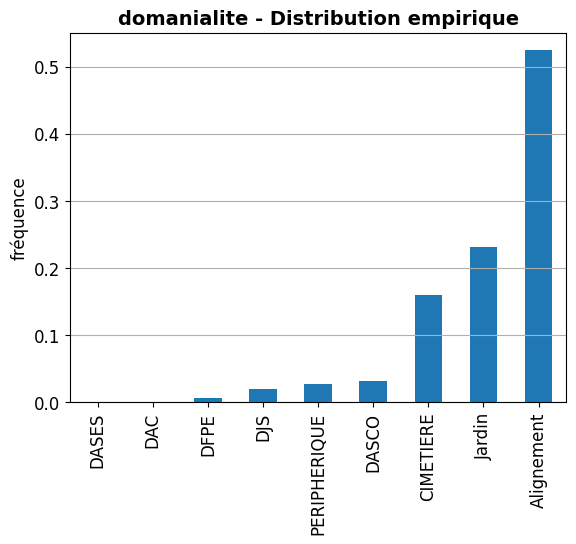

In [13]:
vizQuali("domanialite")

On avez vu qu'il manquait une valeur. Celle-ci peut clairement être supprimée. 
Pour le sport, celle-ci est-elle évidente ?

In [14]:
#regardons de quel arbre il s'agit
dataBrute.loc[dataBrute["domanialite"].isna(),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


In [15]:
#le lieu semble indiquer un jardin, vérifions
dataBrute.loc[dataBrute["lieu"].str.startswith("JARDINS D IMMEUBLES"),"domanialite"].value_counts()

Jardin    81
Name: domanialite, dtype: int64

On pourrait imputer cette valeur.

### Variable `arrondissement`

Cette colonne avait peu (bien que trop ?) de valeurs uniques. On peut la visualiser.

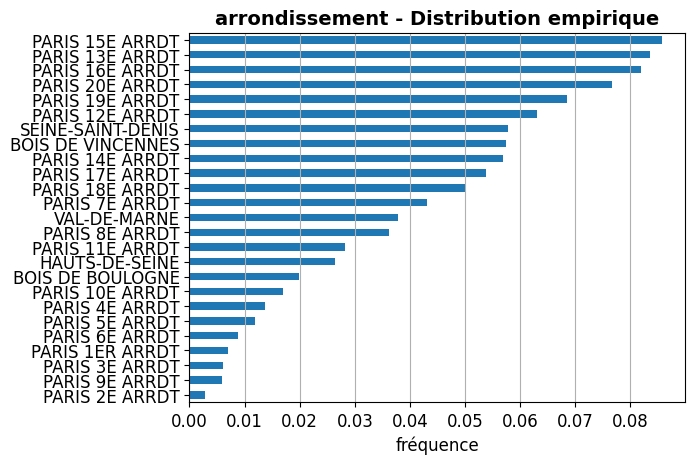

In [16]:
vizQuali("arrondissement",k="barh")

On comprend mieux pourquoi :
- il y avait plus de modalités uniques que d'arrondissements...
- cette colonne n'a pas été créée en type `int`

Après recherche, on s'apparçoit que la ville de Paris a en propriété le bois de Boulogne (rattaché au 16ème arrondissement) et la bois de Vincennes (rattaché au 12ème).

On peut néanmoins s'interroger sur les départements ...

In [17]:
#on filtre pour ne garder que les arbres situés dans les départements
display(dataBrute.loc[dataBrute["arrondissement"].isin(["SEINE-SAINT-DENIS","VAL-DE-MARNE","HAUTS-DE-SEINE"])])

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
34598,139997,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / DIV 40,D00000040021,Erable,Acer,campestre,NaN,75,5,JA,0.0,48.814509,2.368360
34599,139998,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / DIV 40,D00000040023,Erable,Acer,monspessulanum,NaN,90,7,JA,0.0,48.814360,2.367689
34600,140000,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES PLATANES D'OR...,A08200009009,Platane,Platanus,x hispanica,NaN,25,5,J,0.0,48.906793,2.401695
34602,140035,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / AVENUE DU NORD / DIV 46,A09800046001,Platane,Platanus,x hispanica,NaN,308,28,A,0.0,48.815150,2.368099
34603,140036,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / AVENUE DU NORD / DIV 19,A09800019002,Marronnier,Aesculus,hippocastanum,Baumannii',65,8,JA,0.0,48.811981,2.367481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198691,2022764,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE DU POURTOUR EST /...,A101000F7006,Tilleul,Tilia,cordata,NaN,130,10,NaN,0.0,48.767655,2.375209
198692,2022765,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE DU POURTOUR EST /...,A101000F7007,Tilleul,Tilia,cordata,NaN,130,10,NaN,0.0,48.767664,2.375115
198765,2022984,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE SAINT-OUEN NOUV / DIV 31,D00000031050,Abricotier,Prunus,armeniaca,NaN,20,5,NaN,0.0,48.910619,2.349940
198767,2023008,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE SAINT-OUEN NOUV / DIV 31,D00000031051,Prunier à fruits,Prunus,domestica,Reine Claude',20,3,NaN,0.0,48.910663,2.349954


Tous les arbres concernés semble être situés dans des cimetières. Vérifions :

In [18]:
# même filtre, puis on regarde les valeurs de domanialité
dataBrute.loc[dataBrute["arrondissement"].isin(["SEINE-SAINT-DENIS","VAL-DE-MARNE","HAUTS-DE-SEINE"])]["domanialite"].value_counts()

CIMETIERE    24419
DJS             29
Name: domanialite, dtype: int64

C'est majoritairement le cas. Après vérification, Paris possède bien des cimetières extramuros, et quelques installations sportives.

### Variable `complement_addresse`

In [19]:
dataBrute["complement_addresse"].value_counts()

SN°           557
1             552
2             547
3             498
4             464
             ... 
F 10-12         1
F 99            1
93 Flandre      1
F 97            1
40face          1
Name: complement_addresse, Length: 3795, dtype: int64

Les valeurs de cette colonne n'ont pas vraiment de format fixe. Ce qui sera difficilement exploitable. De plus, si l'on souhaite la localisation précise de chaque individus, nous avons à disposition les colonnes latitude et longitude.
**Elle sera supprimée lors du nettoyage**.

### Variable `numero`

Comme vu précédemment, cette colonne est 100% vide.
**Elle sera supprimée lors du nettoyage**.

### Variable `lieu`

Nous avons vu que cette colonne comporte 6921 valeurs uniques. Il ne serait pas opportun de visualiser sa distribution avec un graphique.

On peut néanmoins afficher les 10 plus fréquentes :

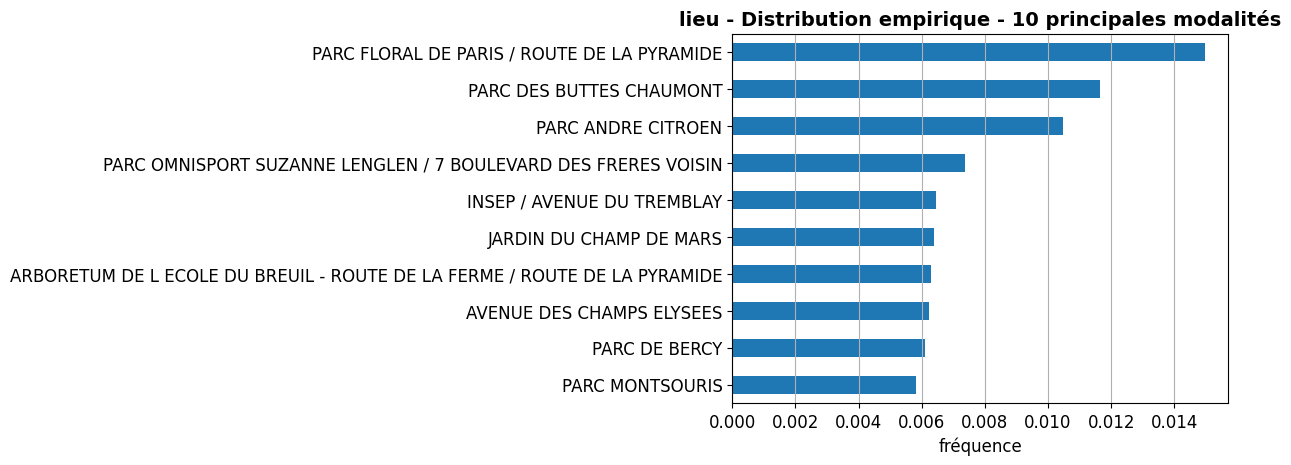

In [20]:
vizQuali("lieu",k="barh",NbMod=10)

Les valeurs de `lieu` semble indiquer, pour certaines d'entre elle :
- d'abord un lieu général
- puis un lieu plus précis (par exemple une rue), après un caractère `/`


Regardons de plus près avec la modalité `CIMETIERE ST VINCENT / DIV 5` pour voir s'il en existe d'autre commençant par `CIMETIERE ST VINCENT...`


In [21]:
modalitesLieu=dataBrute["lieu"].value_counts().index

modalitesLieu[modalitesLieu.str.startswith("CIMETIERE ST VINCENT")]

Index(['CIMETIERE ST VINCENT / AVENUE DE LA FONTAINE DU BUT / DIV 6',
       'CIMETIERE ST VINCENT / AVENUE PRINCIPALE / DIV 5',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N1 / DIV 11',
       'CIMETIERE ST VINCENT / AVENUE PRINCIPALE / DIV 11',
       'CIMETIERE ST VINCENT / AVENUE SAINT VINCENT / DIV 13',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N2 / DIV 12',
       'CIMETIERE ST VINCENT / AVENUE SAINT VINCENT / DIV 12',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 9',
       'CIMETIERE ST VINCENT / AVENUE DE LA FONTAINE DU BUT / DIV 5',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 13',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 12',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 10',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N2 / DIV 9',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N1 / DIV 8',
       'CIMETIERE ST VINCENT / AVENUE PRINCIPALE / DIV 8',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N2 / DIV 13',
      

On pourrait séparer cette colonne en deux pour avoir les deux informations à dispositon. la première partie est notamment particulièrement intéressante, car il permet de regrouper les arbres par secteur, un peu comme avec la colonne arrondissment.

### Variable `id_emplacement`

Nous avons vu que cette colonne contient différents formats. Pour se rendre compte de l'ampleur du problème, on peut regarder la taille des valeurs :

In [22]:
#détectons la taille des valeurs 
dataBrute["id_emplacement"].str.len().value_counts()


6     92166
12    31928
7     27354
8     18300
2     10920
5      7187
3      5241
9      3802
1      2894
4       316
10       21
15        8
Name: id_emplacement, dtype: int64

Les valeurs de `id_emplacement` ont des tailles vraiment différents d'un individus à l'autre. Le formatage n'est donc pas uniforme ou exploitable. **Elle sera supprimée lors du nettoyage**.

### Variables `libelle_francais`, `genre`, `espece` et `variete`

Ces colonnes ont toute pour but de caractériser un arbre selon son espèce au sens large.

Nous avons vu qu'elles avaient entre 100 et 600 modalités. Voyons ce qui en ressort pour les 20 plus fréquentes :

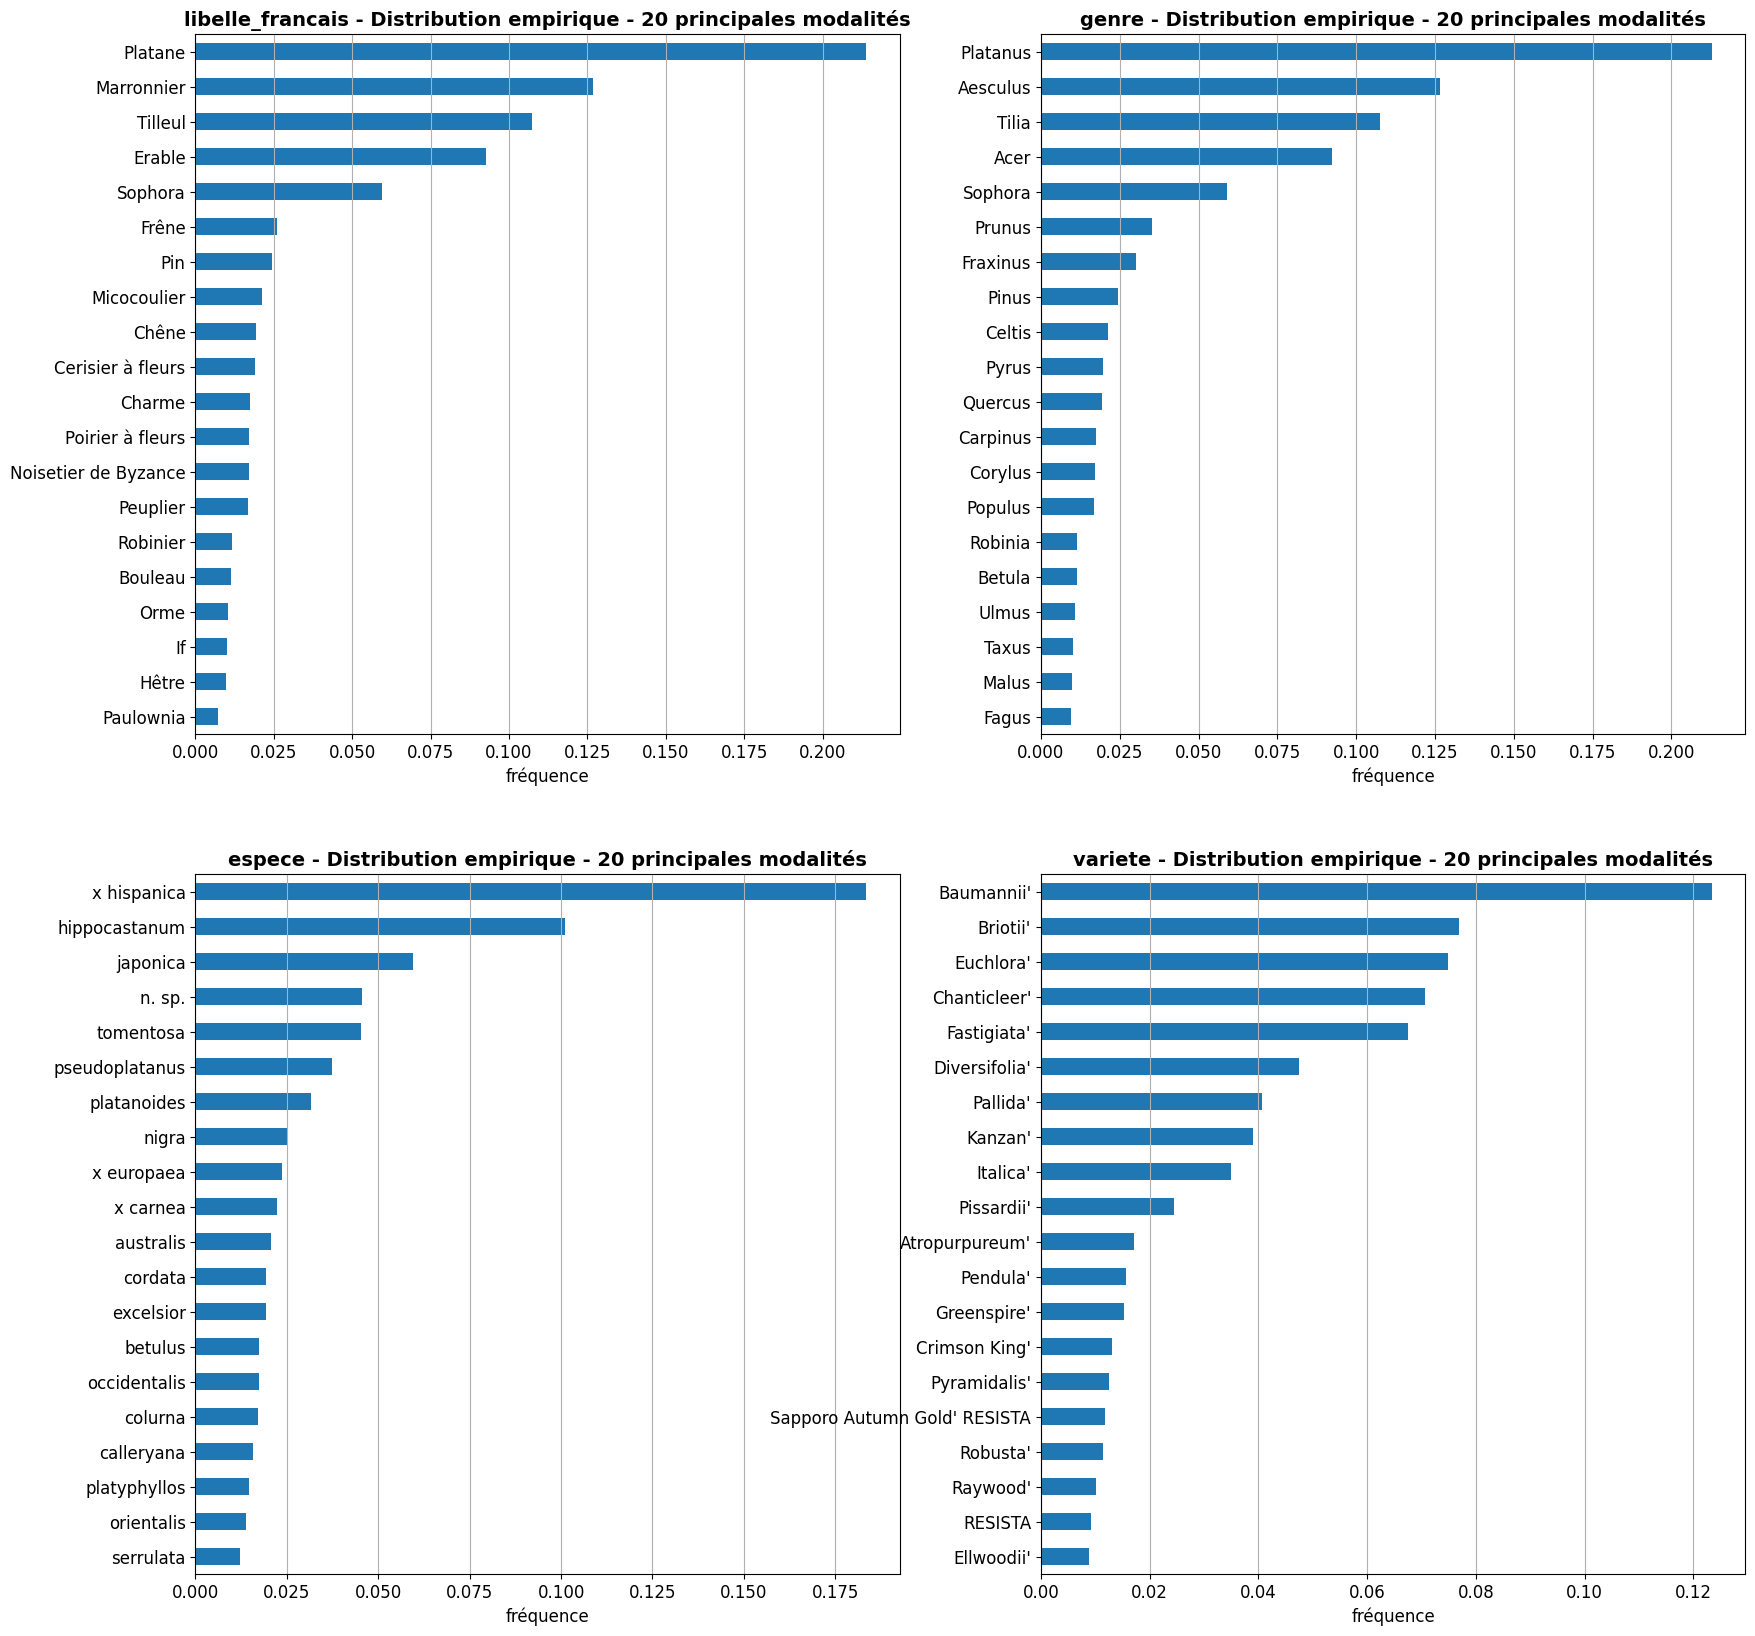

In [23]:
list=["libelle_francais", "genre", "espece", "variete"]

plt.figure(figsize=(20,20))
for X in list :
    plt.subplot(2,2,list.index(X)+1)
    vizQuali(X,k="barh",NbMod=20)

!!!!!!!!!!!!!!!!!!!!!!!!

### Variables `circonference_cm` et `hauteur_m`

Comme vu précédemment ces colonnes ont des valeurs qui semblent aberrantes :

In [24]:
#on reprend le tableau produit plus haut, en filtrant sur les colonnes circonference_cm et hauteur_m, 
#ainsi que sur les mesures à contrôler 
dataDescribe.loc[["mean","std", "min", "max","25%",'50%',"75%"],["circonference_cm","hauteur_m"]]

,circonference_cm,hauteur_m
mean,83.380479,13.110509
std,673.190213,1971.217387
min,0.0,0.0
max,250255.0,881818.0
25%,30.0,5.0
50%,70.0,8.0
75%,115.0,12.0


Ces valeurs aberrantes perturbent la bonne compréhension de nos données :
- la moyenne et donc l'écart-type y sont très sensibles. On ne peut donc pas faire confiance aux valeurs ci-dessus
- si l'on souhaite prioriser l'entretien des arbres en fonction de leur taille (par exemple si l'on souhaite faire une campagne avec des véhicules spécifiques sur les plus hauts sujets), ces données ne nous permettent pas de la faire correctement


Pour mieux visualiser le problème, nous pouvons représenter la répartition de l'ensemble des valeurs prises par `circonference_cm` et `hauteur_m` sous la forme d'une "**boite à moustaches**".

Expliquons de quoi il s'agit. Ce type de graphique permet de représenter la position de :
- 25% ou **Q1** : 1er quartile, 25% des valeurs sont en dessous, 75% au dessus
- 50% ou **Med** : médiane, 50% des valeurs sont en dessous, 50% au dessus
- 75% ou **Q3** : 3ème quartile, 75% des valeurs sont en dessous, 25% au dessus

l'intervalle entre Q1 et Q3 contient 50% des valeurs prises. La taille de cet intervalle s'appelle l'**écart interquartile IQR**. Il prend la forme d'un rectangle sur la "boite à moustaches".

C'est ce même IQR qui permet de déterminer quelles valeurs sont considérées comme aberrantes :
- **on retire les valeurs inférieures à 1,5 x IQR**
- **on retire les valeurs supérieures à 1,5 x IQR**

Graphiquement, c'est ainsi qu'on obtient les "moustaches" entre le rectangle et les nouveaux maximum (B sur l'image ci-dessous) et minimum (A sur l'image ci-dessous).

les valeurs aberrantes (outliers sur l'image) déterminées sont représentées par des points.

![](1508878760102_Boxplot.jpeg)

Voyons ce que cela donne avec nos colonnes `circonference_cm` et `hauteur_m` :

<Axes: >

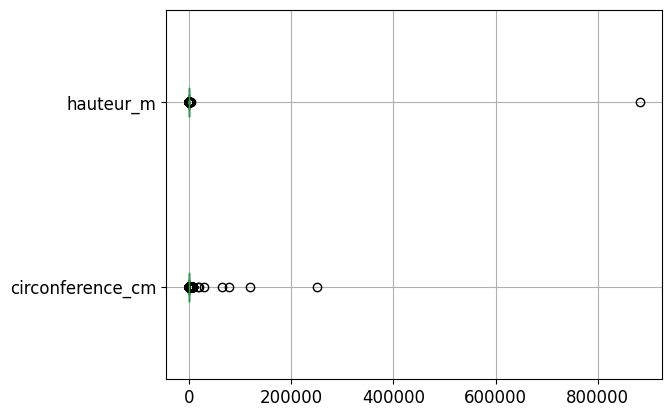

In [25]:
dataBrute.boxplot(column=["circonference_cm","hauteur_m"],vert=False) #affichage des deux boites à moustaches

Ces valeurs aberrantes perturbent la bonne compréhension de nos données :
- la moyenne et donc l'écart-type y sont très sensibles. On ne peut donc pas faire confiance aux valeurs ci-dessus
- si l'on souhaite prioriser l'entretien des arbres en fonction de leur taille (par exemple si l'on souhaite faire une campagne avec des véhicules spécifiques sur les plus hauts sujets), ces données ne nous permettent pas de la faire correctement

Il faudra donc **traiter ces valeurs aberrantes lors du nettoyage des données**.

## 2.2) Nettoyage<a class="anchor" id="22"></a>

In [26]:
# création d'un dataframe pour le le nettoyage
dataPropre=dataBrute.copy()

### Suppression `type_emplacement` et `numero`

In [27]:
# suppression colonnes inutiles "type_emplacement" (1 unique valeur), "numéro" (pas du tout renseignée)
dataPropre=dataPropre.drop(columns=["type_emplacement","numero"])

### Suppression `complement_addresse` et `id_emplacement`

In [28]:
# suppression colonnes "complement_addresse" et "id_emplacement" 
#(trop d'erreurs de formatage pour des colonnes qui ne nous intéressent pas)
dataPropre=dataPropre.drop(columns=["complement_addresse","id_emplacement"])

### Imputation valeur manquante `domanialité`

In [29]:
# on impute la valeur manquante sur domanialité
dataPropre.loc[dataPropre["domanialite"].isna(),"domanialite"]="Jardin"

### Séparation `lieu` en deux : `lieuMacro` et `lieuMicro`

In [30]:
#on sépare la colonne "lieu" en deux
dataPropre["lieuMacro"]=dataPropre["lieu"].str.split("/",n=1,expand=True)[0] #on crée une colonne pour la 1ère partie
dataPropre["lieuMicro"]=dataPropre["lieu"].str.split("/",n=1,expand=True)[1] #idem pour la 2ème
dataPropre.loc[dataPropre["lieuMicro"].astype(str)=="None","lieuMicro"]=np.nan #None passés en NaN

dataPropre[["lieuMacro","lieu"]].describe()

,lieuMacro,lieu
count,200137,200137
unique,3531,6921
top,CIMETIERE DE PANTIN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE
freq,9135,2995


On voit que le **mode** de `lieu` ne reflétait pas la zone la plus arborée.
On peut comparer les 2 distributions (sur les modalités les plus fréquentes) de `lieu` et `lieuMacro` :

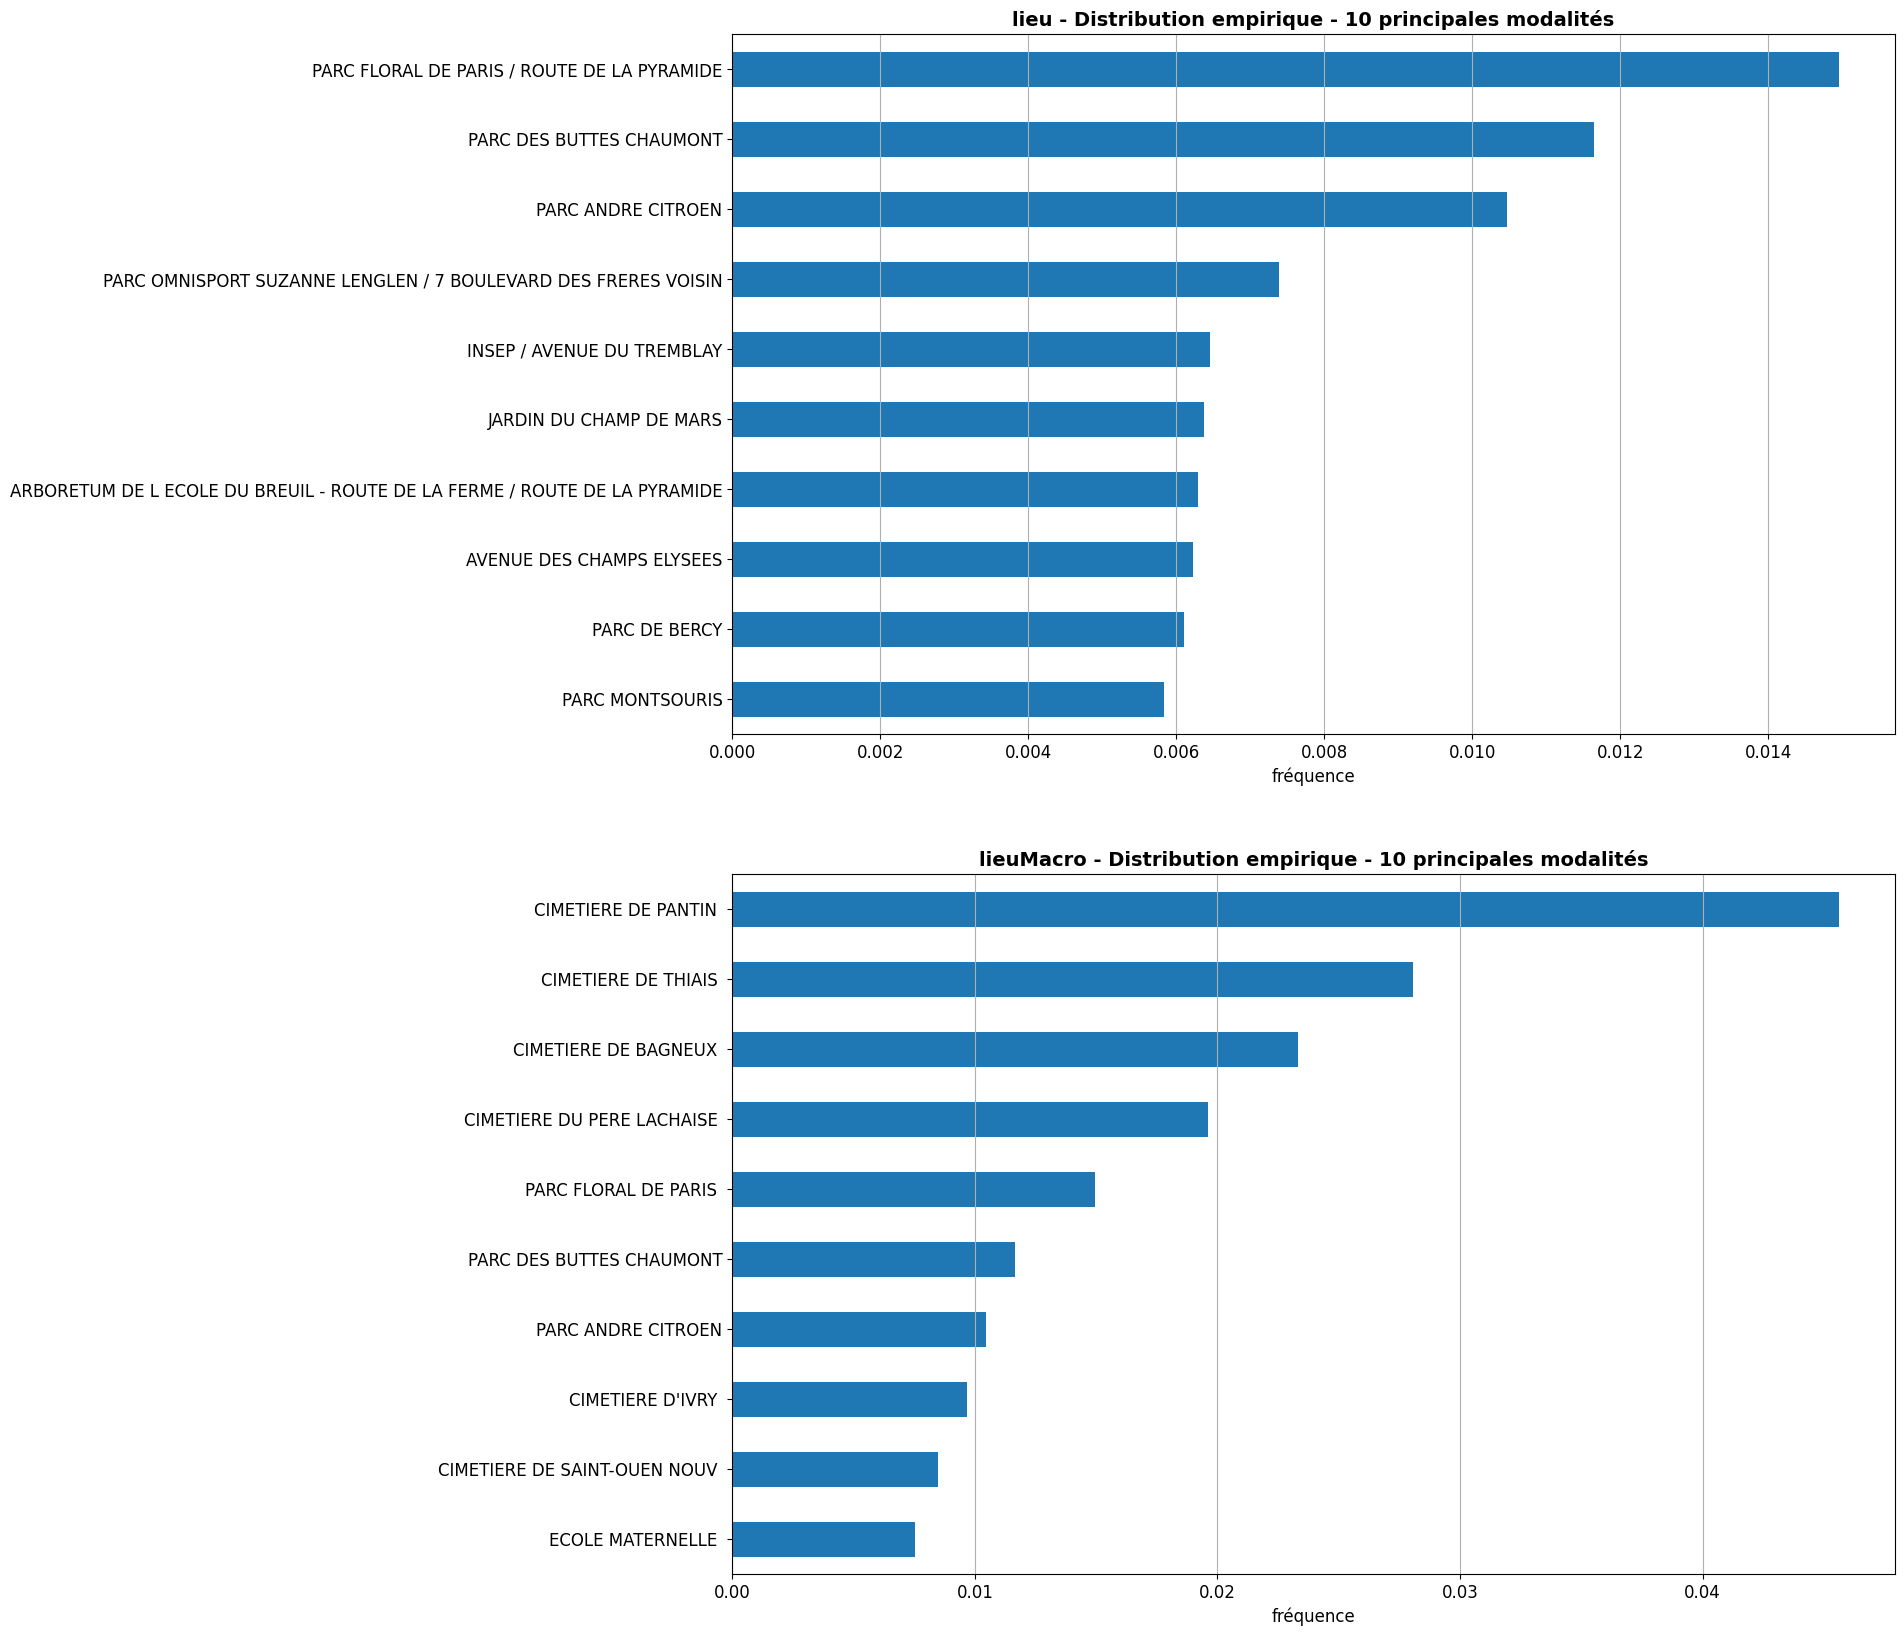

In [31]:
plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
vizQuali("lieu",df=dataPropre,k="barh",NbMod=10)
plt.subplot(2,1,2)
vizQuali("lieuMacro",df=dataPropre,k="barh",NbMod=10)

Cette nouvelle colonne pourrait servir à organiser les tournées par secteurs géographique.

Imaginons par exemple que la mairie du 13ème arrondissement souhaite planifier les interventions de ses agents. Elle pourrait répartir ces opérations par grandes zones ou rues. Les effectifs en arbres de ces zones permettraient de dimensionner précisément chaque intervention en temps et en équipes, et même de programmer la communication et les arrêtés de voirie.

In [32]:

dataPropre.groupby(["arrondissement","lieuMacro"]).count().loc["PARIS 13E ARRDT"].sort_values('id',ascending=False)["id"].head(20)

lieuMacro
BOULEVARD AUGUSTE BLANQUI             805
RUE DE TOLBIAC                        714
BOULEVARD DE L HOPITAL                562
BOULEVARD ARAGO                       481
CENTRE SPORTIF GEORGES CARPENTIER     423
AVENUE DE CHOISY                      413
PARC KELLERMANN                       400
AVENUE D ITALIE                       394
SQUARE RENE LE GALL                   362
BOULEVARD VINCENT AURIOL              353
SQUARE DE CHOISY                      342
BOULEVARD KELLERMANN                  295
BOULEVARD MASSENA                     295
AVENUE D IVRY                         277
RUE BOBILLOT                          271
AVENUE DES GOBELINS                   260
ECOLE MATERNELLE                      243
AVENUE DE FRANCE                      213
STADE CHARLETTY                       212
QUAI D AUSTERLITZ                     174
Name: id, dtype: int64

### Traitement des valeurs aberrantes de `circonference_cm` et `hauteur_m`

Nous allons représenter 

# PARTIE 3 - SYNTHÈSE DE L'ANALYSE DE DONNÉES<a class="anchor" id="P3"></a>